# EDA_Filmaffinity

## Análisis cinematográfico de los últimos 50 años

### TEMA:

Seleccionando más de 5000 películas, desde 1972 hasta la actualidad, con las mejores valoraciones, según los usuarios de Filmaffinity, voy a analizar la evolución de las películas teniendo en cuenta el año de estreno, duración, género, dirección, guión, protagonista, país, nota y votos.

### OBTENCIÓN DE DATOS:

1. Librerías

In [8]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Chromedriver

In [ ]:
chrome_driver_path = 'chromedriver.exe'
options  = webdriver.ChromeOptions()
driver = webdriver.Chrome(executable_path = chrome_driver_path, options = options)
url = "https://www.filmaffinity.com/es/topgen.php?genres=&chv=0&movietype=movie%7Cex-tv&country=&fromyear=1972&toyear=2023&ratingcount=3&runtimemin=2&runtimemax=4"
driver.get(url)

3. Lista de urls

In [ ]:
lista_peliculas = []

peliculas = driver.find_elements(By.CLASS_NAME, 'mc-title')

for pelicula in peliculas[:]:
    lista_peliculas.append(pelicula.find_element(By.TAG_NAME, 'a').get_attribute('href'))

4. Diccionario

In [ ]:
fa = {'TITULO': [],
    'AÑO': [],
    'DURACION (min)': [],
    'GENERO': [],
    'DIRECCION': [],
    'GUION': [],
    'PROTAGONISTA': [],
    'PAIS': [],
    'NOTA': [],
    'VOTOS': []}

In [ ]:
for pelicula in lista_peliculas[4680:]:

    response = requests.get(pelicula)
    soup = BeautifulSoup(response.text, 'html.parser')

    titulo = soup.find('dd', {'itemprop':'title'}).text
    fa['TITULO'].append(titulo)

    año = soup.find('dd', {'itemprop':'year'}).text
    fa['AÑO'].append(int(año))

    duracion = soup.find('dd', {'itemprop':'duration'}).text.strip(' min.')
    fa['DURACION (min)'].append(int(duracion))

    genero = soup.find('span', {'itemprop':'genre'}).text
    fa['GENERO'].append(genero)

    direccion = soup.find('a', {'itemprop':'url'})
    director = direccion['title']
    fa['DIRECCION'].append(director)

    guionista = soup.find('span', {'class':'nb'}).text
    fa['GUION'].append(guionista)

    actor = soup.find('div', {'itemprop': 'name'}).text
    fa['PROTAGONISTA'].append(actor)

    bandera = soup.find('img', {'class':'nflag'})
    pais = bandera['alt']
    fa['PAIS'].append(pais)

    ratio = soup.find('div', {'id':'movie-rat-avg'})
    nota = ratio['content']
    fa['NOTA'].append(float(nota))

    recuento = soup.find('span', {'itemprop':'ratingCount'})
    voto = recuento['content']
    fa['VOTOS'].append(int(voto))

5. DataFrame

In [ ]:
Filmaffinity = pd.DataFrame(fa)

In [ ]:
Filmaffinity.to_csv('DF', index=False)

Tras realizar webscrapping he obtenido un dataframe con 5040 películas, con sus respectivos datos.

In [4]:
df = pd.read_csv('..\data\DF.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5040 entries, 0 to 5039
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TITULO          5040 non-null   object 
 1   AÑO             5040 non-null   int64  
 2   DURACION (min)  5040 non-null   int64  
 3   GENERO          5040 non-null   object 
 4   DIRECCION       5040 non-null   object 
 5   GUION           5040 non-null   object 
 6   PROTAGONISTA    5040 non-null   object 
 7   PAIS            5040 non-null   object 
 8   NOTA            5040 non-null   float64
 9   VOTOS           5040 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 393.9+ KB


In [5]:
df.set_index('TITULO').head(10)

,AÑO,DURACION (min),GENERO,DIRECCION,GUION,PROTAGONISTA,PAIS,NOTA,VOTOS
TITULO,,,,,,,,,
(500) días juntos,2009,96,Romance,Marc Webb,Marc Webb,Joseph Gordon-Levitt,Estados Unidos,6.9,62814
"...Y si no, nos enfadamos",1974,92,Comedia,Marcello Fondato,Marcello Fondato,Terence Hill,Italia,5.9,5238
10 razones para odiarte,1999,97,Comedia,Gil Junger,Gil Junger,Heath Ledger,Estados Unidos,5.9,21667
10.000 KM,2014,98,Romance,Carlos Marqués-Marcet,Carlos Marqués-Marcet,Natalia Tena,España,6.4,10015
100 metros,2016,108,Drama,Marcel Barrena,Marcel Barrena,Dani Rovira,España,6.6,8968
12,2007,153,Drama,Nikita Mikhalkov,Nikita Mikhalkov,Sergey Makovetskiy,Rusia,6.4,1841
12 años de esclavitud,2013,133,Drama,Steve McQueen,Steve McQueen,Miklós B. Székely,Hungría,7.3,63616
12 monos,1995,130,Ciencia ficción,Terry Gilliam,Terry Gilliam,Bruce Willis,Estados Unidos,7.4,119335
120 pulsaciones por minuto,2017,143,Drama,Robin Campillo,Robin Campillo,Nahuel Pérez Biscayart,Francia,6.9,4105


In [70]:
df.describe().round(2)

,AÑO,DURACION (min),NOTA,VOTOS
count,5040.00,5040.00,5040.00,5040.00
mean,2003.62,113.89,6.56,16216.45
std,12.98,19.37,0.54,26417.90
min,1972.00,90.00,5.80,1000.00
25%,1995.00,100.00,6.10,2129.00
50%,2006.00,110.00,6.50,5287.00
75%,2014.00,123.00,6.90,17101.50
max,2023.00,450.00,9.00,202065.00


### HIPÓTESIS:

1. Las películas más antiguas están mejor valoradas que las nuevas.

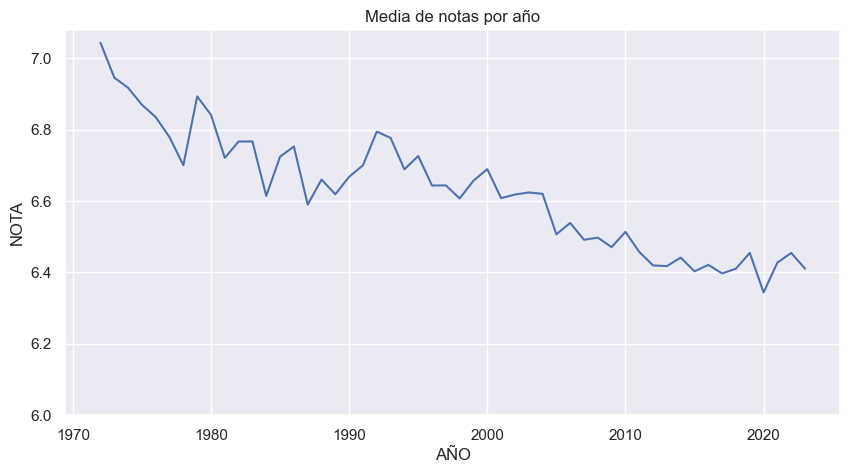

In [9]:
df_media = df.groupby('AÑO')['NOTA'].mean().reset_index()

sns.set(style='darkgrid')

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=df_media, x='AÑO', y='NOTA')
ax.set_xlabel('AÑO')
ax.set_ylabel('NOTA')
ax.set_title('Media de notas por año')

ax.set_ylim(bottom=6)



plt.show()

*Efectivamente podemos observar un descenso en la media de las notas a lo largo de los años.*

2. En 2020 se estrenaron menos películas por el cierre de las salas debido a la pandemia.


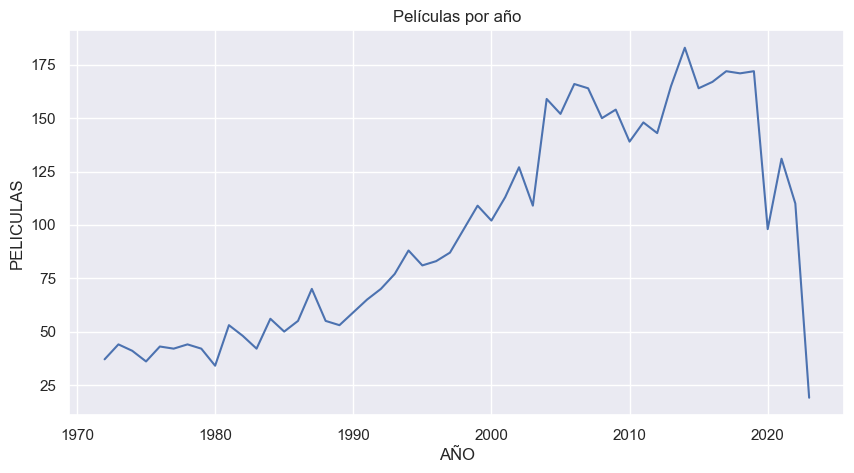

In [10]:
recuento_anual = df['AÑO'].value_counts().sort_index()


df_recuento = pd.DataFrame({'AÑO': recuento_anual.index, 'Recuento': recuento_anual.values})


sns.set(style='darkgrid')


fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=df_recuento, x='AÑO', y='Recuento')
ax.set_xlabel('AÑO')
ax.set_ylabel('PELICULAS')
ax.set_title('Películas por año')

plt.show()

*En 2020 vemos una bajada en el número de películas con respecto a años anteriores. La caída al final de la gráfica representa que como he seleccionado también las películas que se estrenan este año, al encontrarnos en Mayo, todavía faltan por estrenarse algunas que perfectamente se incluirían en este TOP.*

3. En los últimos 3 años se hacen más películas de más de 120 minutos.


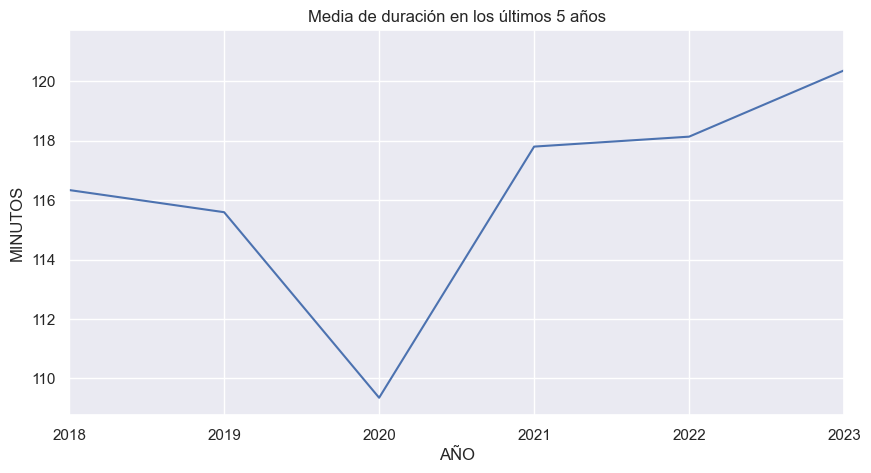

In [11]:
media_duraciones = df.groupby('AÑO')['DURACION (min)'].mean().reset_index()

sns.set(style='darkgrid')


fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=media_duraciones, x='AÑO', y='DURACION (min)')
ax.set_xlabel('AÑO')
ax.set_ylabel('MINUTOS')
ax.set_title('Media de duración en los últimos 5 años')
plt.xlim(2018,2023)

plt.show()

*Desde 2020 la media de duración ha aumentado, llegando a superar en 2023 las dos horas de media.*

4. Existe correlación positiva entre la duración y la nota. A mayor duración, mayor valoración.


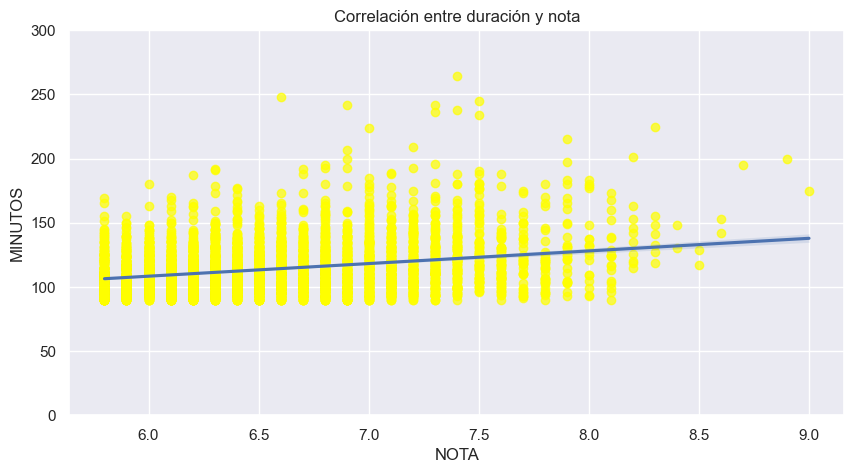

In [12]:
sns.set(style='darkgrid')

fig, ax = plt.subplots(figsize=(10, 5))
sns.regplot(data=df, x='NOTA', y='DURACION (min)', scatter_kws={'color': 'yellow', 'alpha': 0.7})
ax.set_xlabel('NOTA')
ax.set_ylabel('MINUTOS')
ax.set_title('Correlación entre duración y nota')
ax.set_ylim(0, 300)

plt.show()

*A medida que la duración aumenta, las películas suelen obtener una mayor puntuación.*

5. El Drama es el género mejor valorado.


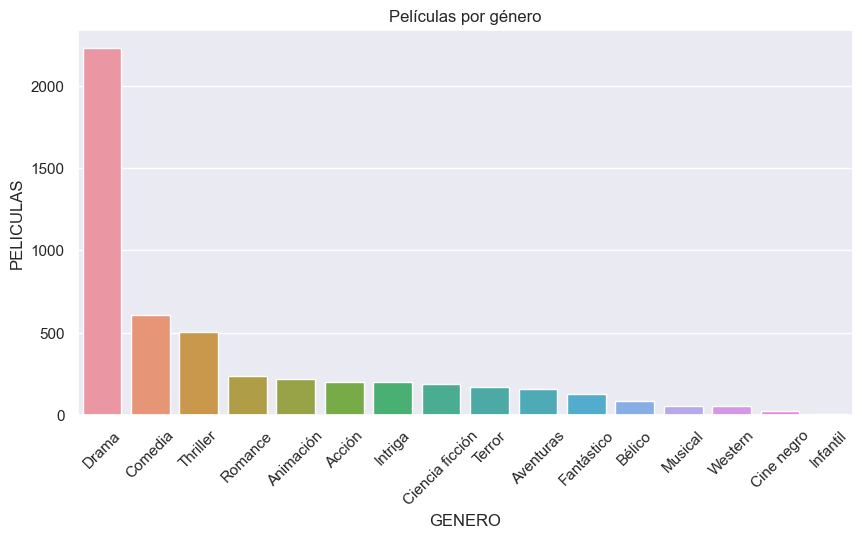

In [13]:
sns.set(style='darkgrid')

conteo_genero = df['GENERO'].value_counts()

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=conteo_genero.index, y=conteo_genero.values)
ax.set_xlabel('GENERO')
ax.set_ylabel('PELICULAS')
ax.set_title('Películas por género')

plt.xticks(rotation=45);

*Teniendo en cuenta que la lista es un TOP de las mejores películas en los últimos 50 años, al observar que más de la mitad de las películas son del género Drama, podemos afirmar lo planteado en la hipótesis.*

6. El Terror es el género peor valorado.


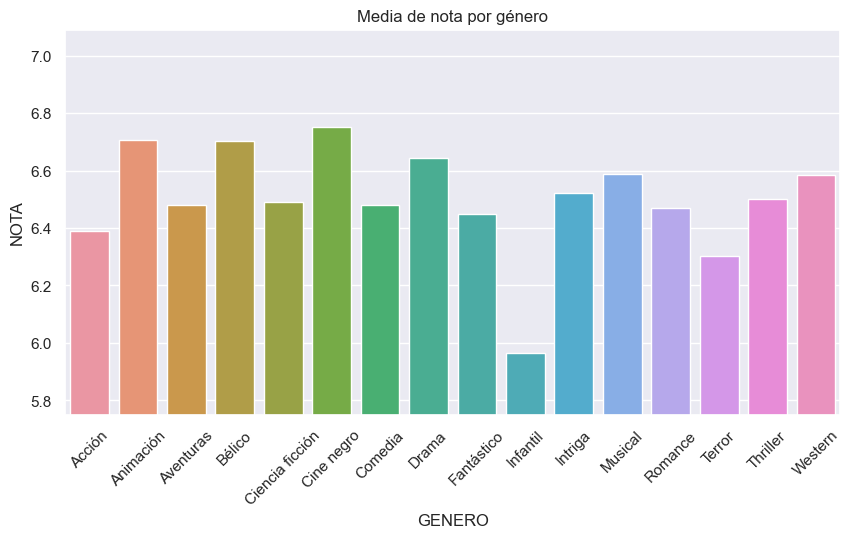

In [14]:
sns.set(style='darkgrid')

media_nota_por_genero = df.groupby('GENERO')['NOTA'].mean()

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=media_nota_por_genero.index, y=media_nota_por_genero.values)
ax.set_xlabel('GENERO')
ax.set_ylabel('NOTA')
ax.set_title('Media de nota por género')
ax.set_ylim(5.75)

plt.xticks(rotation=45);

*Con respecto a la hipótesis anterior, aquí cambiamos la perspectiva, y ordenamos los géneros según su puntuación media. Nos encontramos que el Cine negro es el mejor valorado, y desmintiendo la hipótesis actual, el género Infantil es el peor valorado.*

7. Cada vez se hacen menos Westerns.


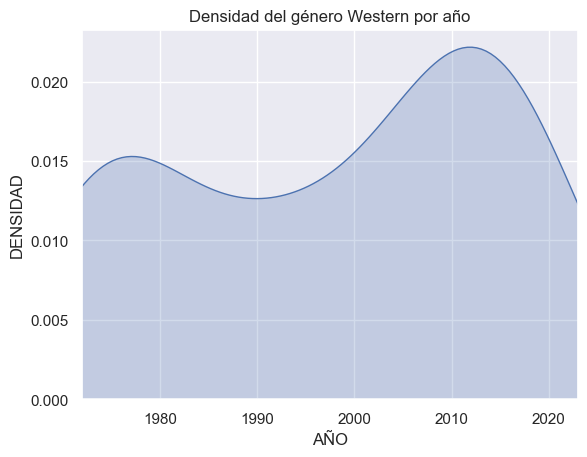

In [15]:
western_data = df[df['GENERO'] == 'Western']

sns.set(style='darkgrid')
sns.kdeplot(data=western_data['AÑO'], fill=True)


plt.xlabel('AÑO')
plt.ylabel('DENSIDAD')
plt.title('Densidad del género Western por año')
plt.xlim(1972,2023)

plt.show()

*El gráfico no representa fielmente lo planteado en la hipótesis, ya que la era dorada del Western (1940-1960) se encuentra fuera de la muestra seleccionada. En los últimos años, no aparecen más de 5 películas anuales de este género.*

8. Martin Scorsese es el director con más películas.


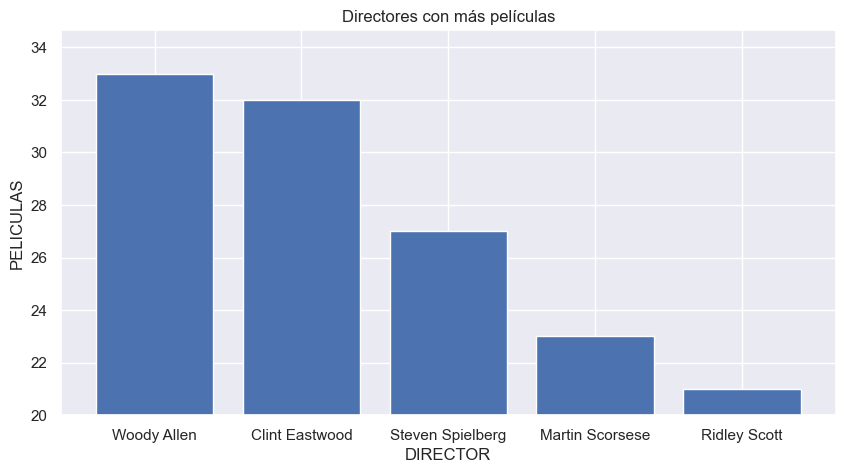

In [65]:
top_10 = df['DIRECCION'].value_counts().head(5)

sns.set(style='darkgrid')
plt.figure(figsize=(10, 5))
plt.bar(top_10.index, top_10.values)

plt.title('Directores con más películas')
plt.xlabel('DIRECTOR')
plt.ylabel('PELICULAS')
plt.ylim(20)

# plt.xticks(rotation=45)

plt.show()


*Scorsese es el cuarto en la lista. El director con más películas es Woody Allen.*

9. Steven Spielberg es el director con mayor media de duración.


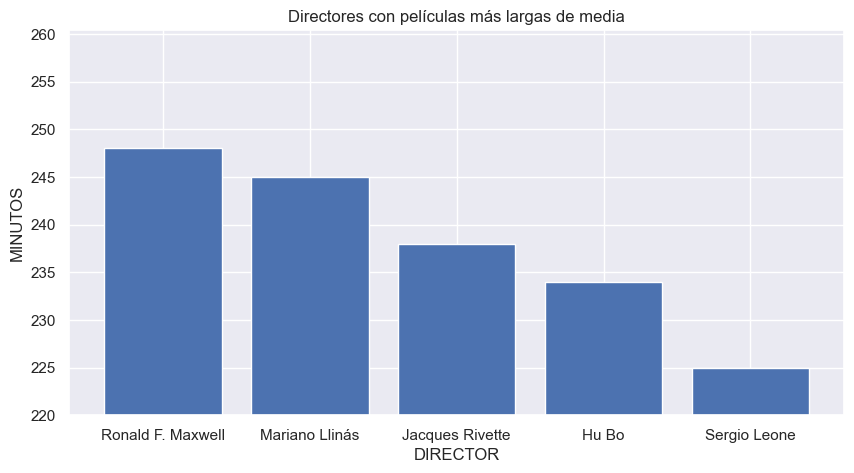

In [64]:
mtd = df.groupby('DIRECCION')['DURACION (min)'].mean().sort_values(ascending=False).head(5)

sns.set(style='darkgrid')
plt.figure(figsize=(10, 5))
plt.bar(mtd.index, mtd.values)

plt.title('Directores con películas más largas de media')
plt.xlabel('DIRECTOR')
plt.ylabel('MINUTOS')
plt.ylim(220)

# plt.xticks(rotation=45)

plt.show()

*Ronald F. Maxwell es el director con una media de películas más largas.*

10. Quentin Tarantino es el director con mejor media de nota.


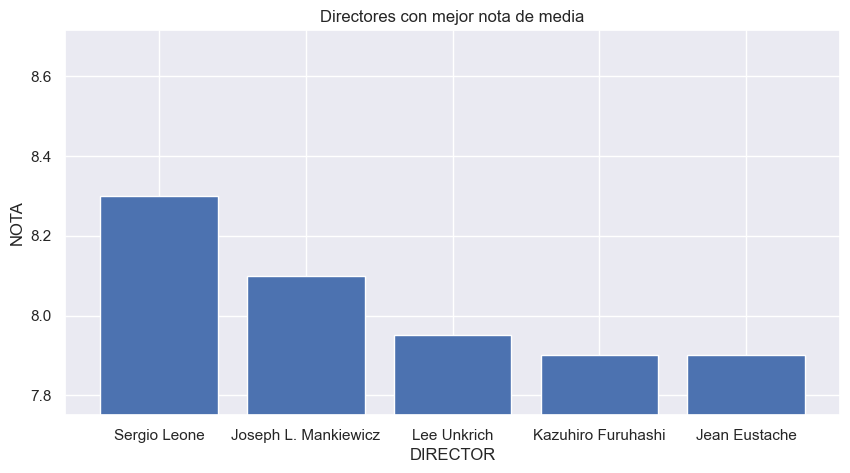

In [63]:
mnd = df.groupby('DIRECCION')['NOTA'].mean().sort_values(ascending=False).head(5)

sns.set(style='darkgrid')
plt.figure(figsize=(10, 5))
plt.bar(mnd.index, mnd.values)

plt.title('Directores con mejor nota de media')
plt.xlabel('DIRECTOR')
plt.ylabel('NOTA')
plt.ylim(7.75)

# plt.xticks(rotation=45)

plt.show()

*Sergio Leone es el director con mejor media de notas.*

11. Steven Spielberg es el director con mayor media de votos.


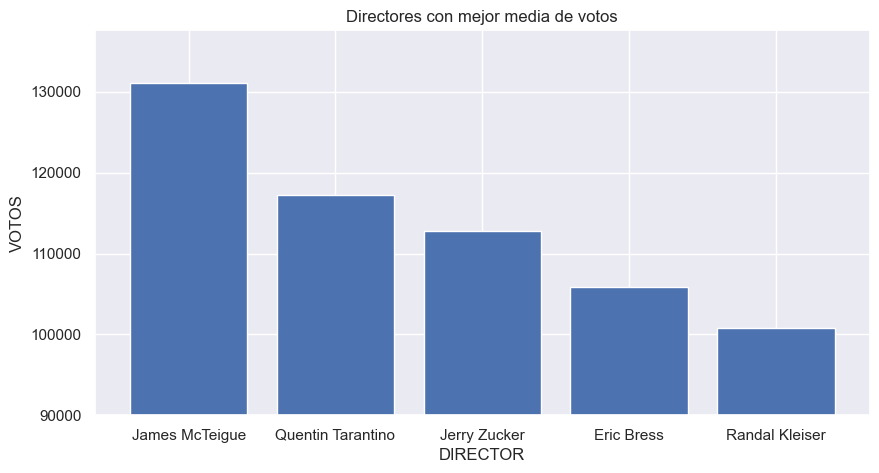

In [62]:
mvd = df.groupby('DIRECCION')['VOTOS'].mean().sort_values(ascending=False).head(5)

sns.set(style='darkgrid')
plt.figure(figsize=(10, 5))
plt.bar(mvd.index, mvd.values)

plt.title('Directores con mejor media de votos')
plt.xlabel('DIRECTOR')
plt.ylabel('VOTOS')
plt.ylim(90000)

# plt.xticks(rotation=45)

plt.show()

*James McTeigue es el director con mejor media de votos.*

12. Quentin Tarantino es el guionista con mejor media de nota.


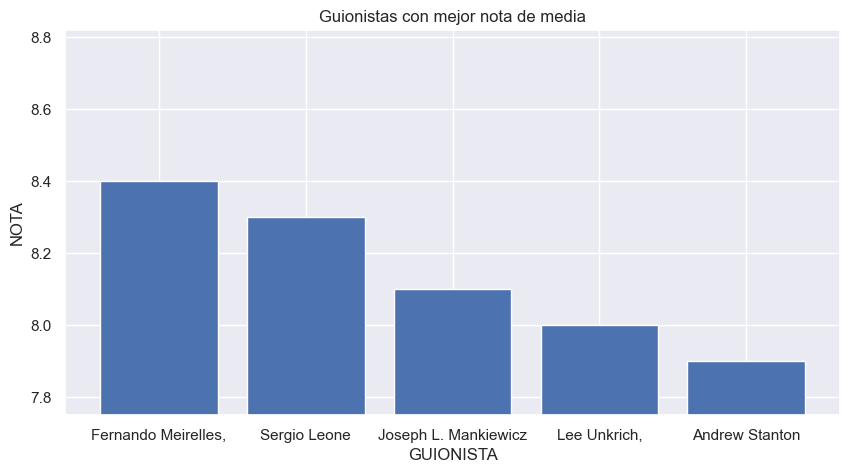

In [60]:
mng = df.groupby('GUION')['NOTA'].mean().sort_values(ascending=False).head(5)

sns.set(style='darkgrid')
plt.figure(figsize=(10, 5))
plt.bar(mng.index, mng.values)

plt.title('Guionistas con mejor nota de media')
plt.xlabel('GUIONISTA')
plt.ylabel('NOTA')
plt.ylim(7.75)

# plt.xticks(rotation=45)

plt.show()

*Fernando Meirelles es el guionista con mejor nota media.*

13. Leonardo DiCaprio es el protagonista con mejor media de nota.


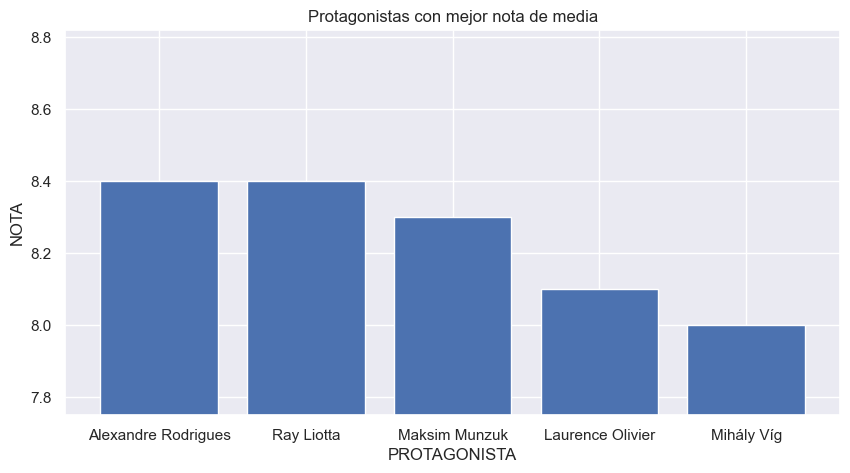

In [59]:
mna = df.groupby('PROTAGONISTA')['NOTA'].mean().sort_values(ascending=False).head(5)

sns.set(style='darkgrid')
plt.figure(figsize=(10, 5))
plt.bar(mna.index, mna.values)

plt.title('Protagonistas con mejor nota de media')
plt.xlabel('PROTAGONISTA')
plt.ylabel('NOTA')
plt.ylim(7.75)

# plt.xticks(rotation=45)

plt.show()

*Alexandre Rodrigues y Ray Liotta son los protagonistas con mayor media de nota.*

14. En Hollywood (Estados Unidos) se producen más películas.


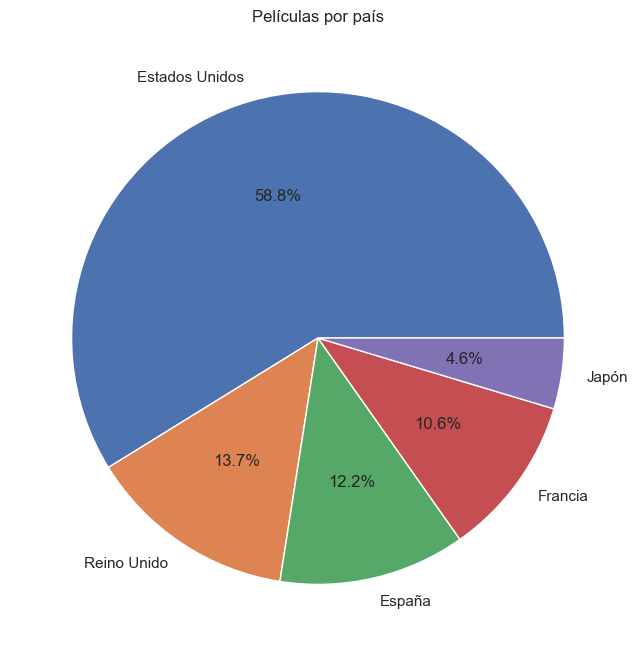

In [68]:
country_counts = df['PAIS'].value_counts().head(5)


country_counts.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%')

plt.title('Películas por país')
plt.ylabel('')

plt.show()

*Estados Unidos tiene el mayor porcentaje de películas en esta muestra.*

15. Existe correlación positiva entre la nota y el número de votos.

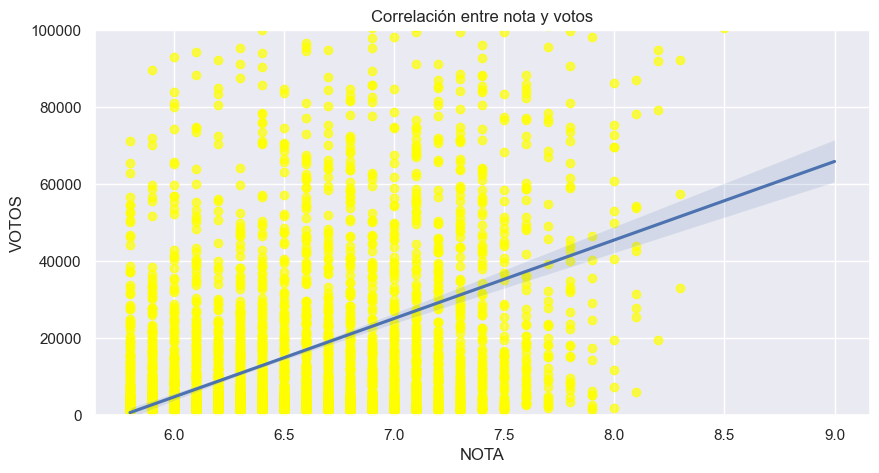

In [69]:
sns.set(style='darkgrid')

fig, ax = plt.subplots(figsize=(10, 5))
sns.regplot(data=df, x='NOTA', y='VOTOS', scatter_kws={'color': 'yellow', 'alpha': 0.7})
ax.set_xlabel('NOTA')
ax.set_ylabel('VOTOS')
ax.set_title('Correlación entre nota y votos')
ax.set_ylim(0, 100000)

plt.show()

*A medida que los votos aumentan, por lo general, la nota de las películas es superior.*